In [1]:
#LinearRegression Assignment

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [9]:
#Loading data set file in to data frame
file_path = 'day.csv'
#using low memory flag to load columns with multiple data types.
data = pd.read_csv(file_path, low_memory=False)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
df.drop(['casual','registered'], axis=1)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [29]:
data['weathersit']=data['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4:'Heavy Rain'})

In [37]:
data['season']=data['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4:'Winter'})

In [62]:
data.shape

(730, 16)

In [63]:
data.tail

<bound method NDFrame.tail of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018  Spring   0     1        0        6           0   
1          2  02-01-2018  Spring   0     1        0        0           0   
2          3  03-01-2018  Spring   0     1        0        1           1   
3          4  04-01-2018  Spring   0     1        0        2           1   
4          5  05-01-2018  Spring   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019  Spring   1    12        0        4           1   
726      727  28-12-2019  Spring   1    12        0        5           1   
727      728  29-12-2019  Spring   1    12        0        6           0   
728      729  30-12-2019  Spring   1    12        0        0           0   
729      730  31-12-2019  Spring   1    12        0        1           1   

    weathersit       temp     atemp      hum  windspeed  

In [90]:
#find missing values in data and multiply by 100 to get %. Isnull gives boolean. Mean will average the missing values count
100*df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

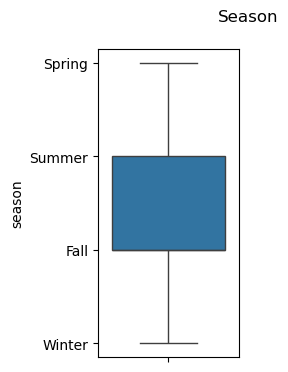

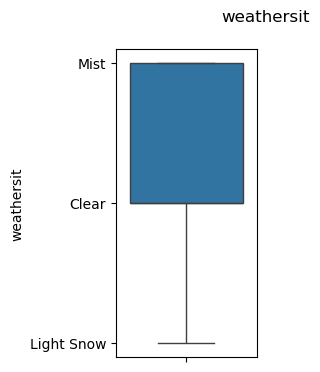

In [57]:
plt.figure(figsize=(4,4))
plt.subplot(1,2,1)
sns.boxplot(data=data.season)
plt.suptitle('Season')
plt.show()
plt.figure(figsize=(4,4))
plt.subplot(1,2,1)
sns.boxplot(data=data.weathersit)
plt.suptitle('weathersit')
plt.show()

/var/folders/4c/17rkl4rn7k30vdcrh61zvf0w0000gn/T/ipykernel_58249/3063487049.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=data.temp)


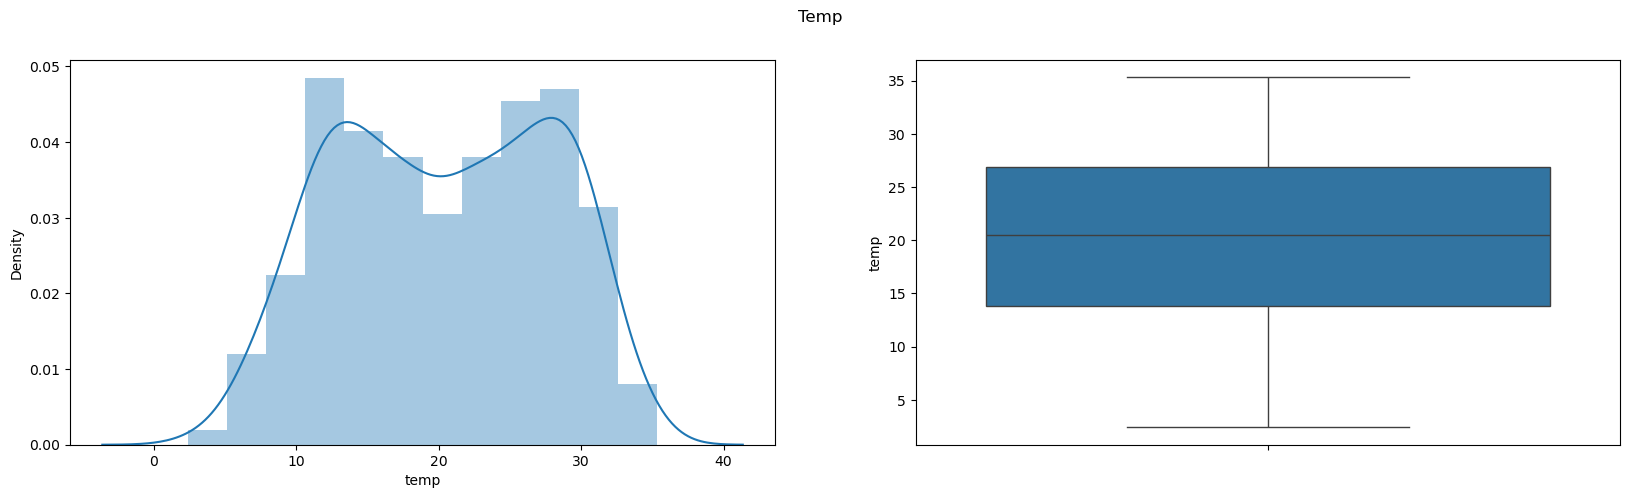

In [66]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(a=data.temp)
plt.subplot(1,2,2)
sns.boxplot(data=data.temp)
plt.suptitle('Temp')
plt.show()

Text(0.5, 1.0, 'Season vs Cnt')

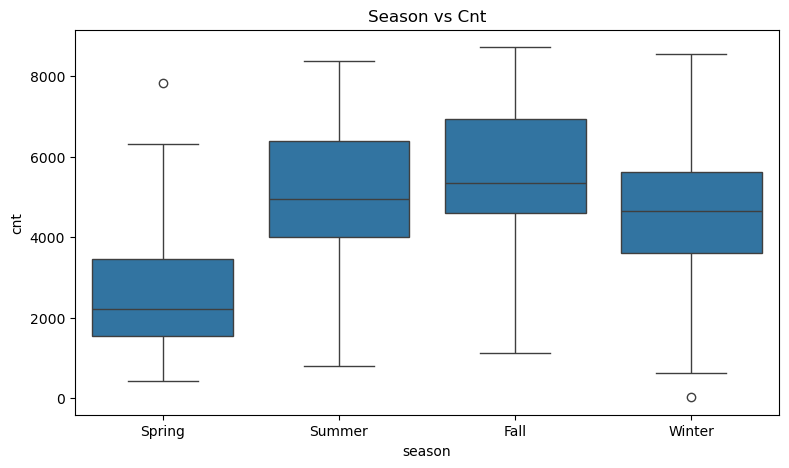

In [85]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='season', y=data.cnt, data=data)
plt.title('Season vs Cnt')


In [94]:
#Before dropping date, let us introduce a days_old variable which indicates how old is the business
data['days_old'] = (pd.to_datetime(data['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [95]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,01-01-2018,Spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,Spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,Spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,Spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,Spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [96]:
# Checking for duplicates and dropping the entire duplicate row if any
data.drop_duplicates(subset=None, inplace=True)

In [108]:
for col in data:
    print(data[col].value_counts(ascending=False), '\n\n\n')

instant
1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: count, Length: 730, dtype: int64 



dteday
01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: count, Length: 730, dtype: int64 



season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64 



yr
0    365
1    365
Name: count, dtype: int64 



mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64 



holiday
0    709
1     21
Name: count, dtype: int64 



weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64 



workingday
1    499
0    231
Name: count, dtype: int64 



weathersit
Clear         463
Mist          246
Light Snow     21
Name: count, dtype: int64 



temp
26.035000    5
10.899

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
 16  days_old    730 non-null    int64  
dtypes: float64(4), int64(10), object(3)
memory usage: 97.1+ KB


In [124]:
# Convert to 'category' data type

data['season']=data['season'].astype('category')
data['weathersit']=data['weathersit'].astype('category')
data['mnth']=data['mnth'].astype('category')
data['weekday']=data['weekday'].astype('category')


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     730 non-null    int64   
 1   dteday      730 non-null    object  
 2   season      730 non-null    category
 3   yr          730 non-null    int64   
 4   mnth        730 non-null    category
 5   holiday     730 non-null    int64   
 6   weekday     730 non-null    category
 7   workingday  730 non-null    int64   
 8   weathersit  730 non-null    category
 9   temp        730 non-null    float64 
 10  atemp       730 non-null    float64 
 11  hum         730 non-null    float64 
 12  windspeed   730 non-null    float64 
 13  casual      730 non-null    int64   
 14  registered  730 non-null    int64   
 15  cnt         730 non-null    int64   
 16  days_old    730 non-null    int64   
dtypes: category(4), float64(4), int64(8), object(1)
memory usage: 78.2+ KB


In [113]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,01-01-2018,Spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,Spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,Spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,Spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,Spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [115]:
bike_new = pd.get_dummies(data, drop_first=True)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Columns: 763 entries, instant to weathersit_Mist
dtypes: bool(751), float64(4), int64(8)
memory usage: 603.9 KB


In [116]:
bike_new.head()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light Snow,weathersit_Mist
0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,...,False,False,False,False,False,False,False,True,False,True
1,2,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,...,False,False,False,False,False,False,False,False,False,True
2,3,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,False,False,True,False,False,False,False,False,False,False
3,4,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,False,False,False,True,False,False,False,False,False,False
4,5,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,False,False,False,False,True,False,False,False,False,False


In [117]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Columns: 763 entries, instant to weathersit_Mist
dtypes: bool(751), float64(4), int64(8)
memory usage: 603.9 KB


In [118]:
bike_new.shape

(730, 763)

In [119]:
bike_new.tail()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light Snow,weathersit_Mist
725,726,1,0,1,10.420847,11.33210,65.2917,23.458911,247,1867,...,False,True,False,False,False,True,False,False,False,True
726,727,1,0,1,10.386653,12.75230,59.0000,10.416557,644,2451,...,False,True,False,False,False,False,True,False,False,True
727,728,1,0,0,10.386653,12.12000,75.2917,8.333661,159,1182,...,False,True,False,False,False,False,False,True,False,True
728,729,1,0,0,10.489153,11.58500,48.3333,23.500518,364,1432,...,False,True,False,False,False,False,False,False,False,False
729,730,1,0,1,8.849153,11.17435,57.7500,10.374682,439,2290,...,False,True,True,False,False,False,False,False,False,True


In [132]:
bike_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt',
       ...
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object', length=762)

In [121]:
for col in bike_new:
    print(bike_new[col].value_counts(ascending=False), '\n\n\n')

instant
1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: count, Length: 730, dtype: int64 



yr
0    365
1    365
Name: count, dtype: int64 



holiday
0    709
1     21
Name: count, dtype: int64 



workingday
1    499
0    231
Name: count, dtype: int64 



temp
26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: count, Length: 498, dtype: int64 



atemp
32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625    2
           ..
28.94730    1
30.46145    1
30.10650    1
31.34500    1
11.17435    1
Name: count, Length: 689, dtype: int64 



hum
61.3333    4
63.0833    3
55.2083    3
60.5000    3
56.8333    3
          ..
54.8333    1
56.1765    1
85.0000    1
76.1250    1
57.7500    1
Name: count, Length: 594, dtype: int64 



windspeed
9.041918     3
11.166689    3
11.250104    3
15.333486    3
7.959064

In [140]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state = 333)

In [141]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,dteday_01-01-2019,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light Snow,weathersit_Mist
483,1,0,0,18.791653,22.50605,58.7083,7.832836,6304,483,False,...,False,False,False,False,False,False,False,False,False,False
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,650,False,...,False,False,False,False,False,False,False,True,False,False
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,212,False,...,False,False,True,False,False,False,False,False,False,False
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,714,False,...,False,True,False,False,False,False,False,False,False,True
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,8,False,...,False,False,False,False,False,False,False,False,False,False


In [142]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 483 to 366
Columns: 760 entries, yr to weathersit_Mist
dtypes: bool(751), float64(4), int64(5)
memory usage: 413.9 KB


In [143]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,dteday_01-01-2019,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light Snow,weathersit_Mist
22,0,0,0,3.957390,4.941955,43.6522,16.522200,986,22,False,...,False,False,False,False,False,False,False,False,False,False
468,1,0,0,20.295000,24.399800,50.2917,12.791439,7460,468,False,...,False,False,False,False,False,False,False,True,False,False
553,1,0,0,33.722500,39.519800,57.3750,8.417143,4672,553,False,...,False,False,False,False,False,False,False,False,False,False
504,1,0,0,25.454153,29.198350,53.0417,17.042589,7129,504,False,...,False,False,False,False,False,False,False,False,False,False
353,0,0,1,15.819153,19.822700,59.5417,4.125244,3750,353,False,...,False,True,False,True,False,False,False,False,False,True


In [144]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Columns: 760 entries, yr to weathersit_Mist
dtypes: bool(751), float64(4), int64(5)
memory usage: 177.7 KB


In [137]:
# Dropping casual and registered columns as as we have cnt column which is sum of the both that is the target column

bike_new.drop(['casual'], axis = 1, inplace = True)
bike_new.drop(['registered'], axis = 1, inplace = True)

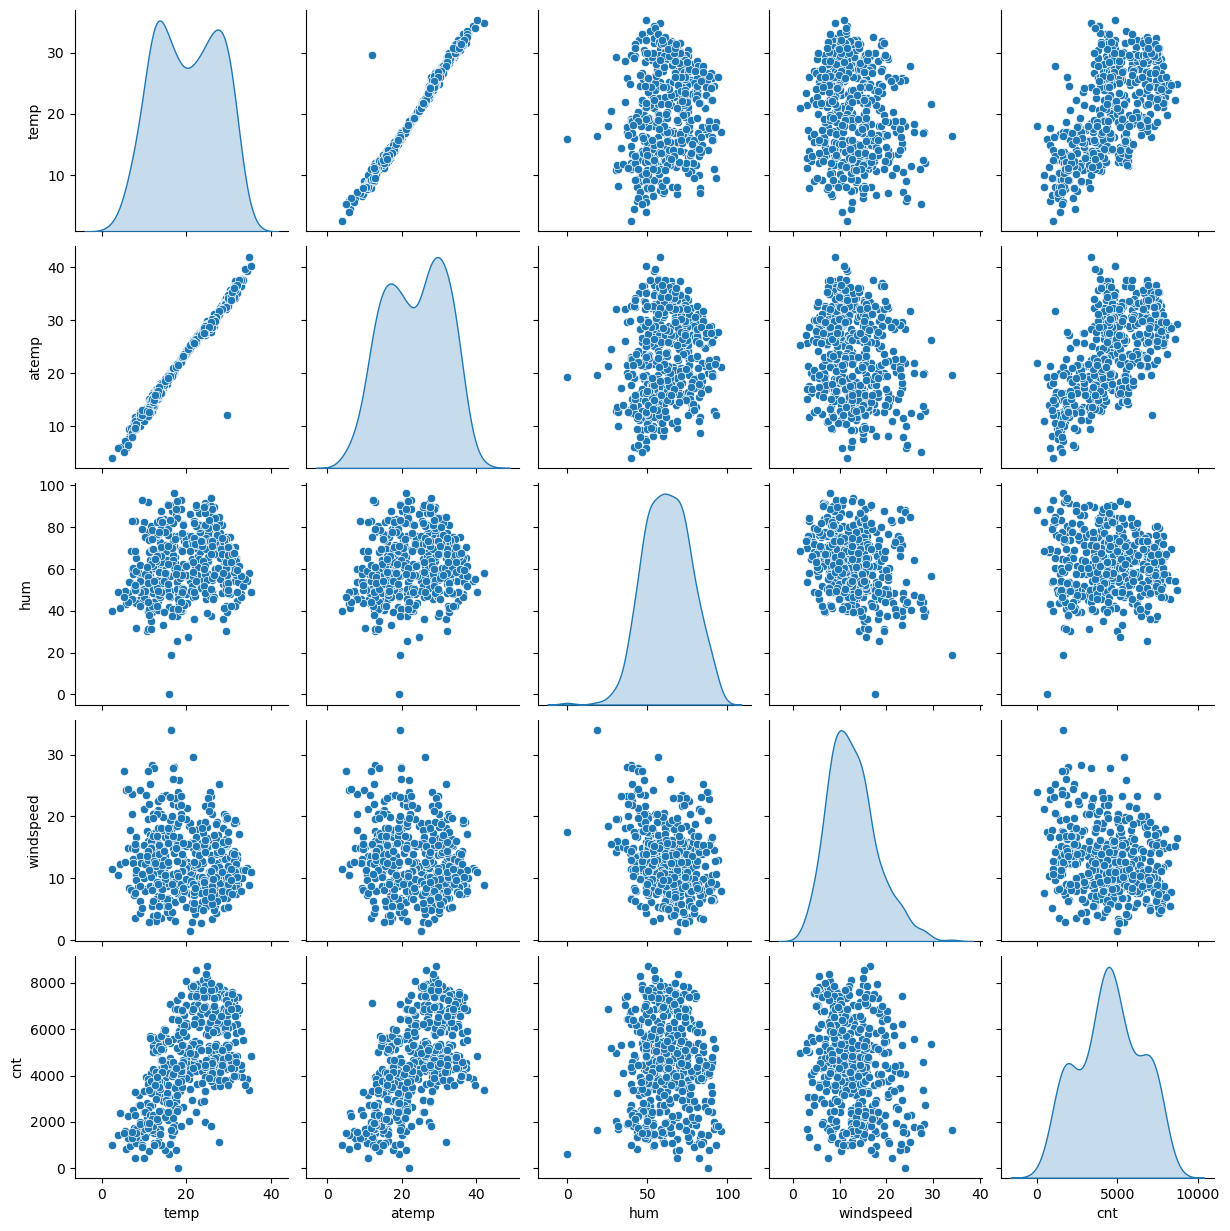

In [138]:
# Create a new dataframe of only numeric variables:

bike_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()


In [139]:
##The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'


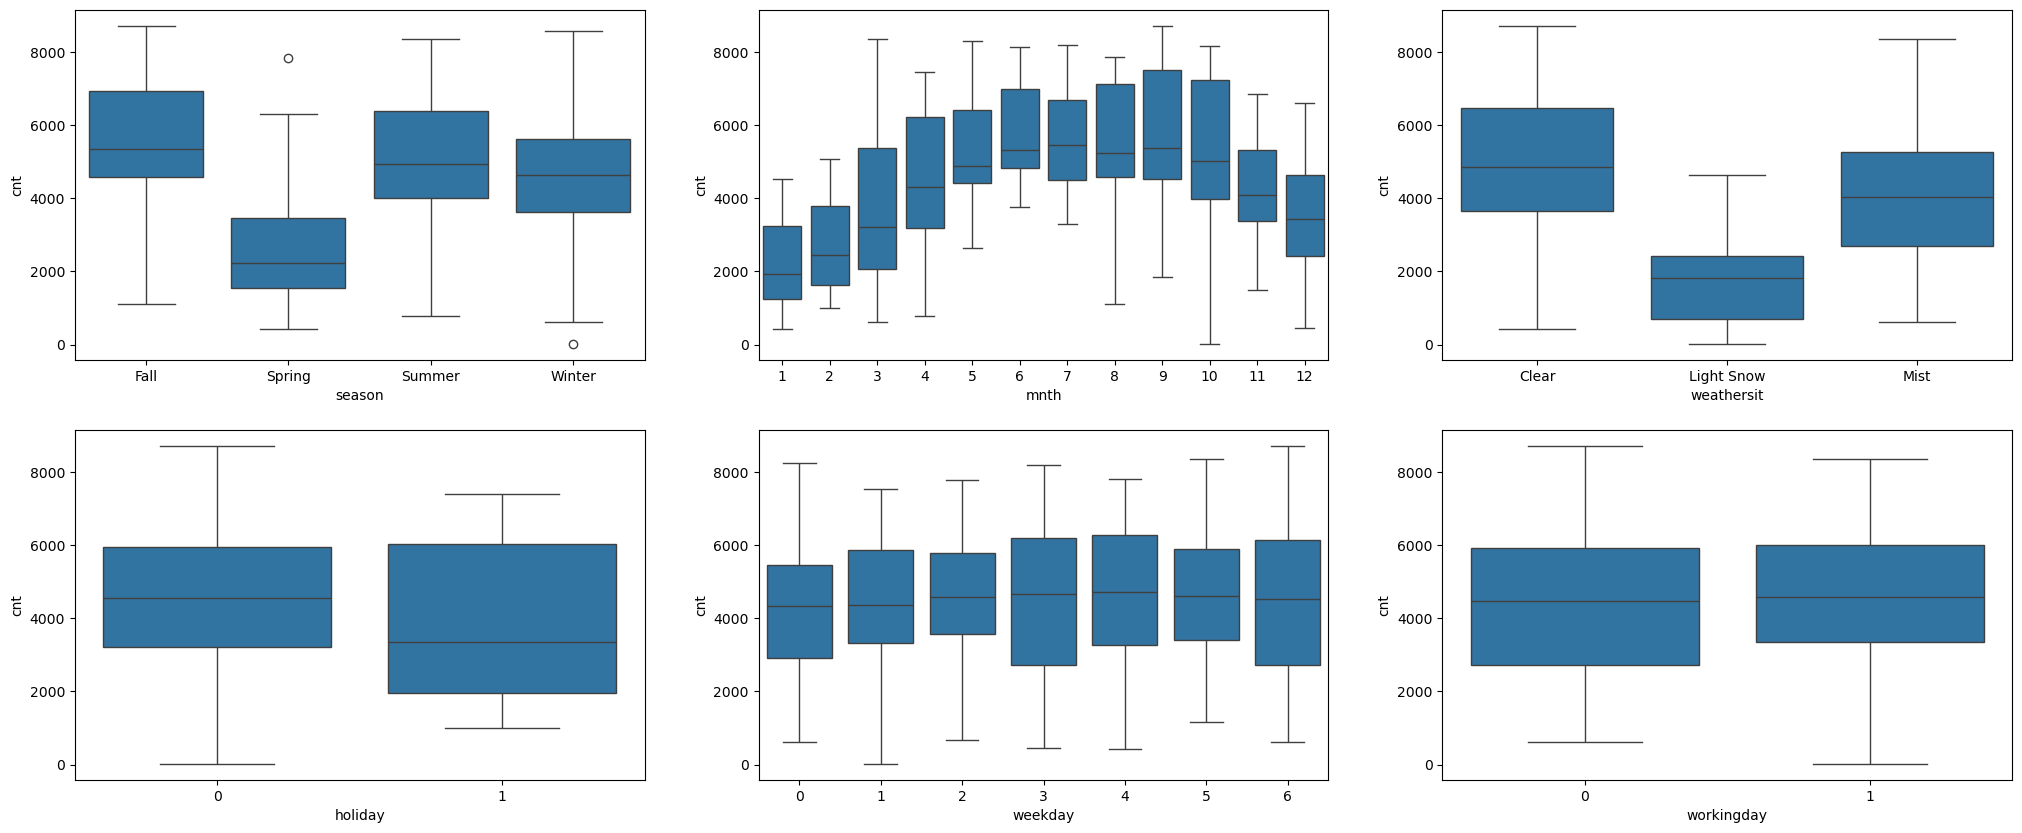

In [149]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.show()

In [ ]:

Insights
There were 6 categorical variables in the dataset.

We used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’) .

The inference that We could derive were:

season: Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

mnth: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

weathersit: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.
holiday: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.
weekday: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.
workingday: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable



In [152]:
data.season.value_counts()


season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64

In [153]:
data.weathersit.value_counts()


weathersit
Clear         463
Mist          246
Light Snow     21
Name: count, dtype: int64

In [373]:
bikeSharing_df = pd.read_csv('day.csv')

In [332]:
bikeSharing_df.info

<bound method DataFrame.info of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windspee

In [374]:
#Before dropping date, let us introduce a days_old variable which indicates how old is the business
bikeSharing_df['days_old'] = (pd.to_datetime(bikeSharing_df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [375]:
# Dropping instant column as it is index column which has nothing to do with target
bikeSharing_df.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
bikeSharing_df.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column
bikeSharing_df.drop(['casual'], axis = 1, inplace = True)
bikeSharing_df.drop(['registered'], axis = 1, inplace = True)

In [376]:
bikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [377]:
bikeSharing_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

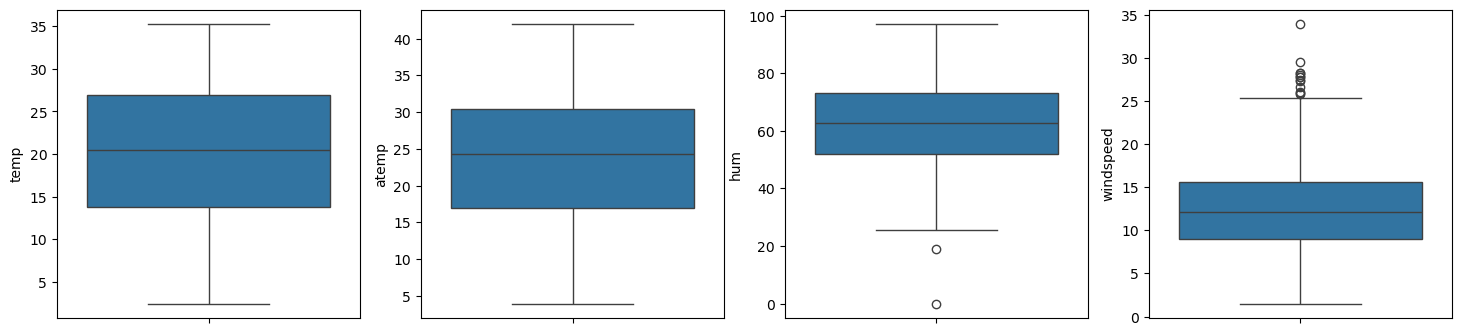

In [186]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'days_old','workingday','holiday','yr','cnt']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=data)
    i+=1

In [378]:

bikeSharing_df.mnth = bikeSharing_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bikeSharing_df.weekday = bikeSharing_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bikeSharing_df.weathersit = bikeSharing_df.weathersit.replace({1:'good',2:'Light',3:'bad',4:'severe'})

bikeSharing_df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,jan,0,sat,0,Light,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,jan,0,sun,0,Light,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


In [379]:
bikeSharing_df.season = bikeSharing_df.season.replace({1:'spring',2:'summer',3:'fall',4:'winter'})

In [380]:
bikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,sat,0,Light,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,Light,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


<Figure size 1500x3000 with 0 Axes>

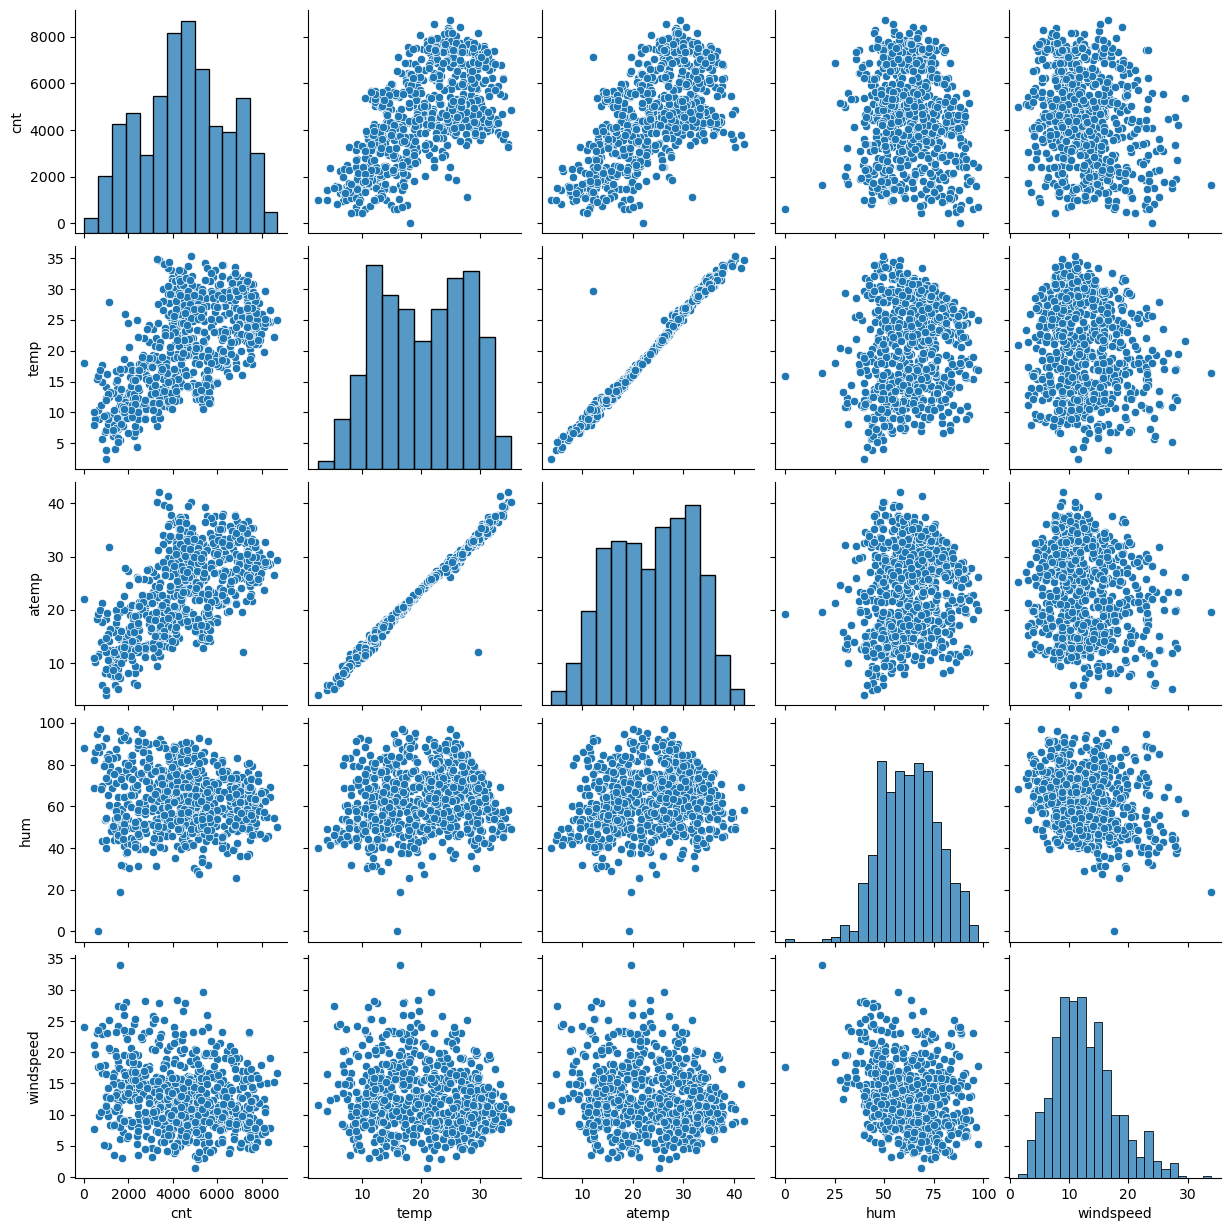

In [337]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bikeSharing_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

Inference:
Looks like the temp and atemp has the highest corelation with the target variable cnt
temp and atemp are highly co-related with each other

<Figure size 2000x1500 with 0 Axes>

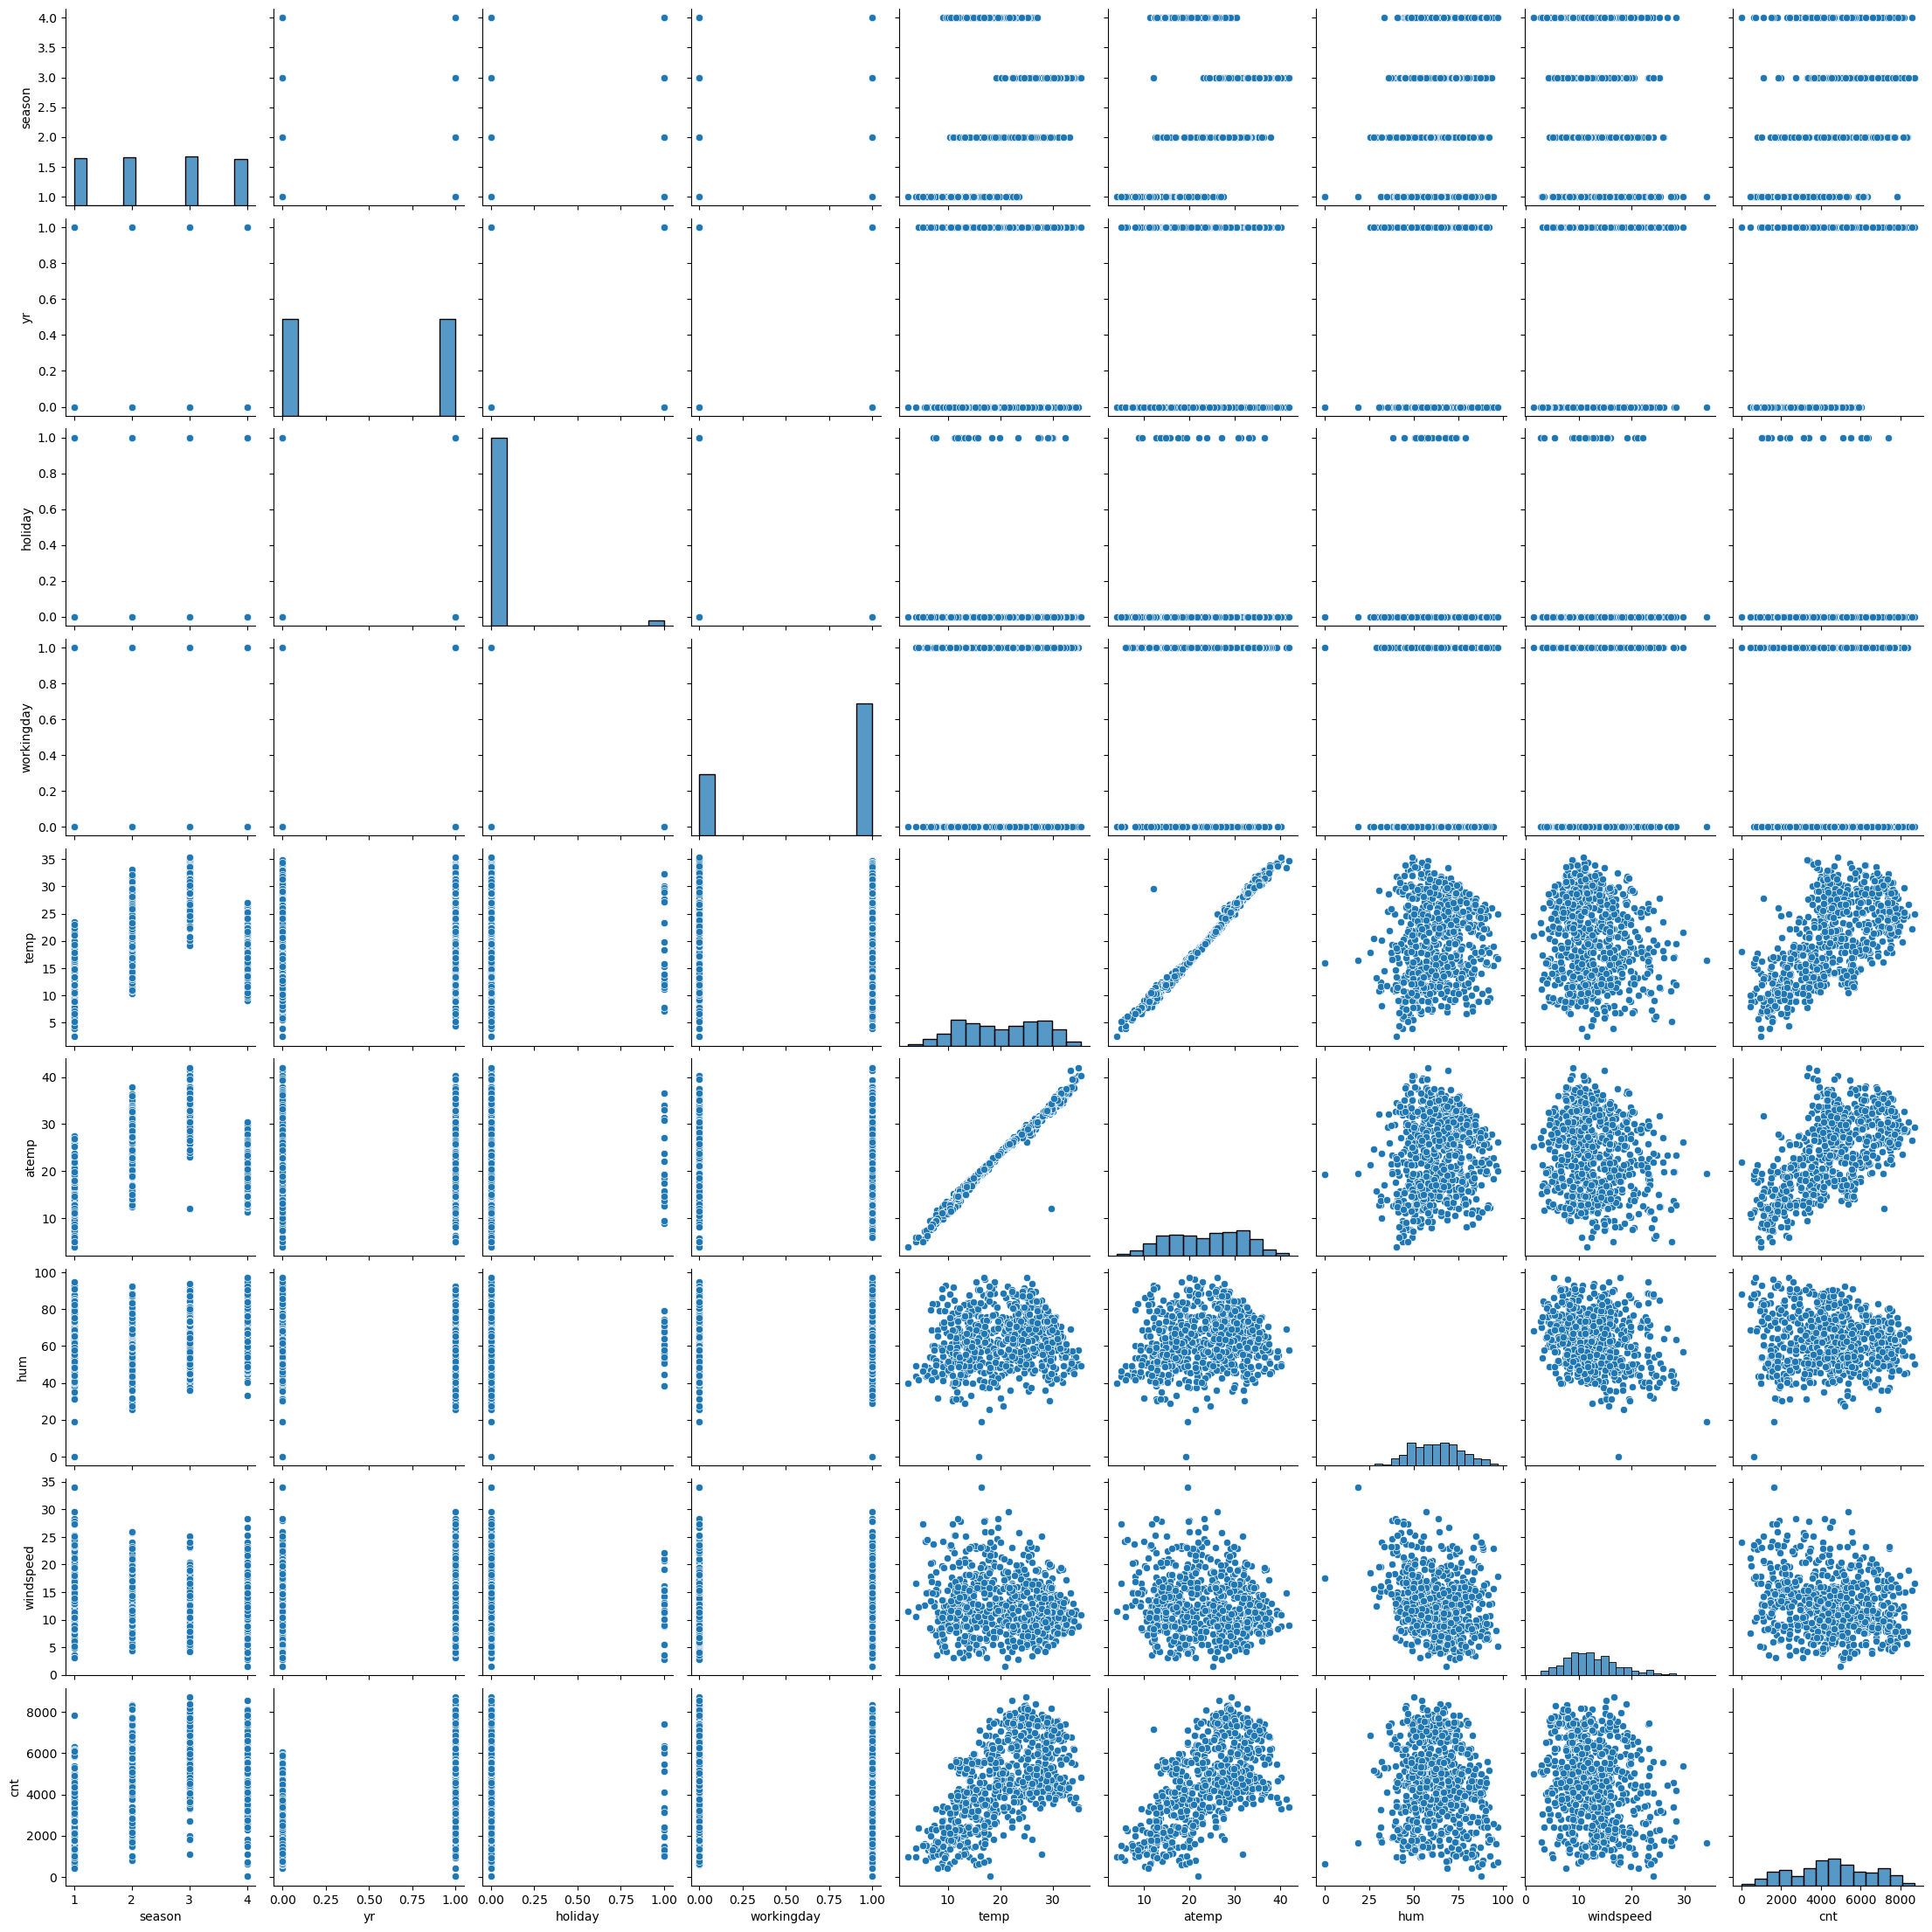

In [338]:
plt.figure(figsize=(20,15))
sns.pairplot(bikeSharing_df)
plt.show()

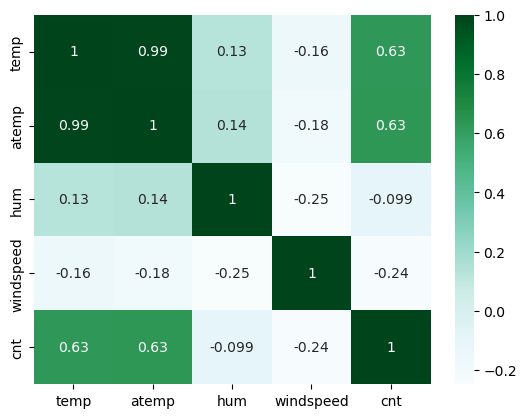

In [339]:
# Checking continuous variables relationship with each other
sns.heatmap(bikeSharing_df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

In [196]:
bike_num = pd.read_csv('day.csv')

In [197]:
# Droping instant column as it is index column which has nothing to do with target
bike_num.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
bike_num.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

bike_num.drop(['casual'], axis = 1, inplace = True)
bike_num.drop(['registered'], axis = 1, inplace = True)

In [198]:
bike_num.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


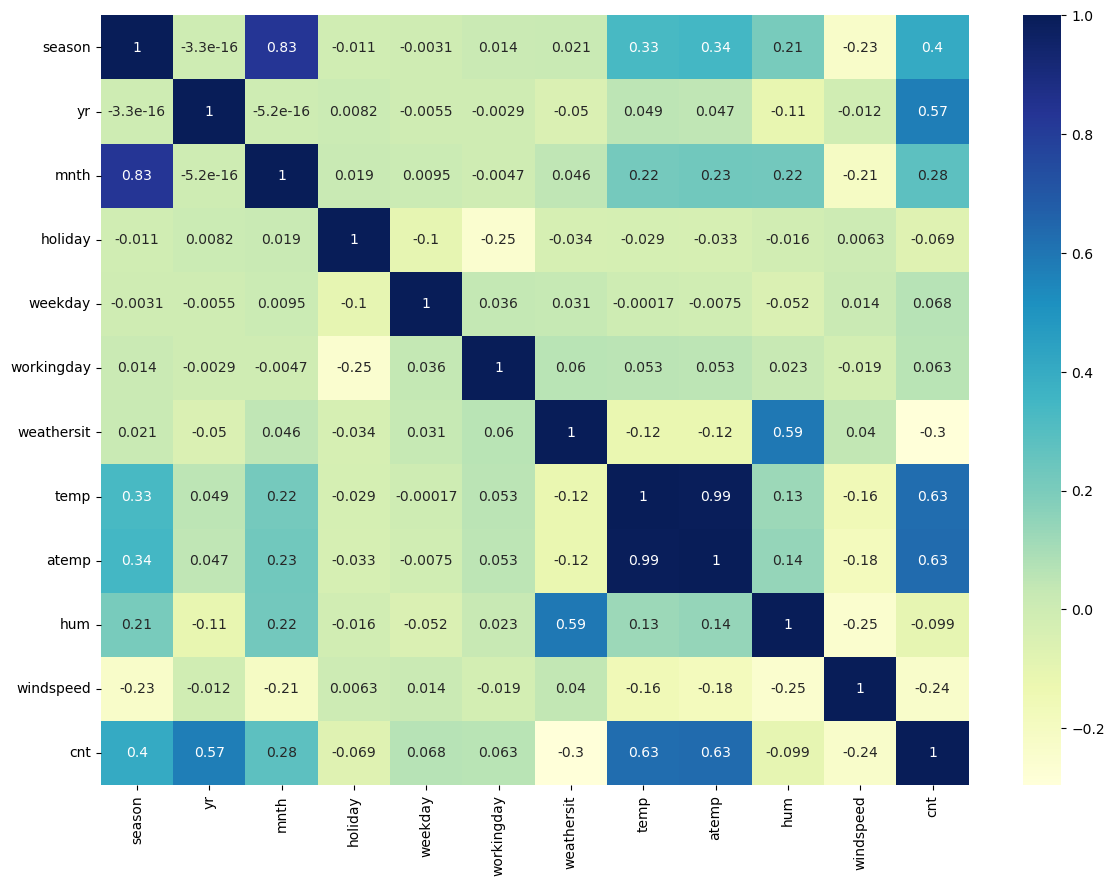

In [200]:
#Correlations for numeric variables
cor=bike_num.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

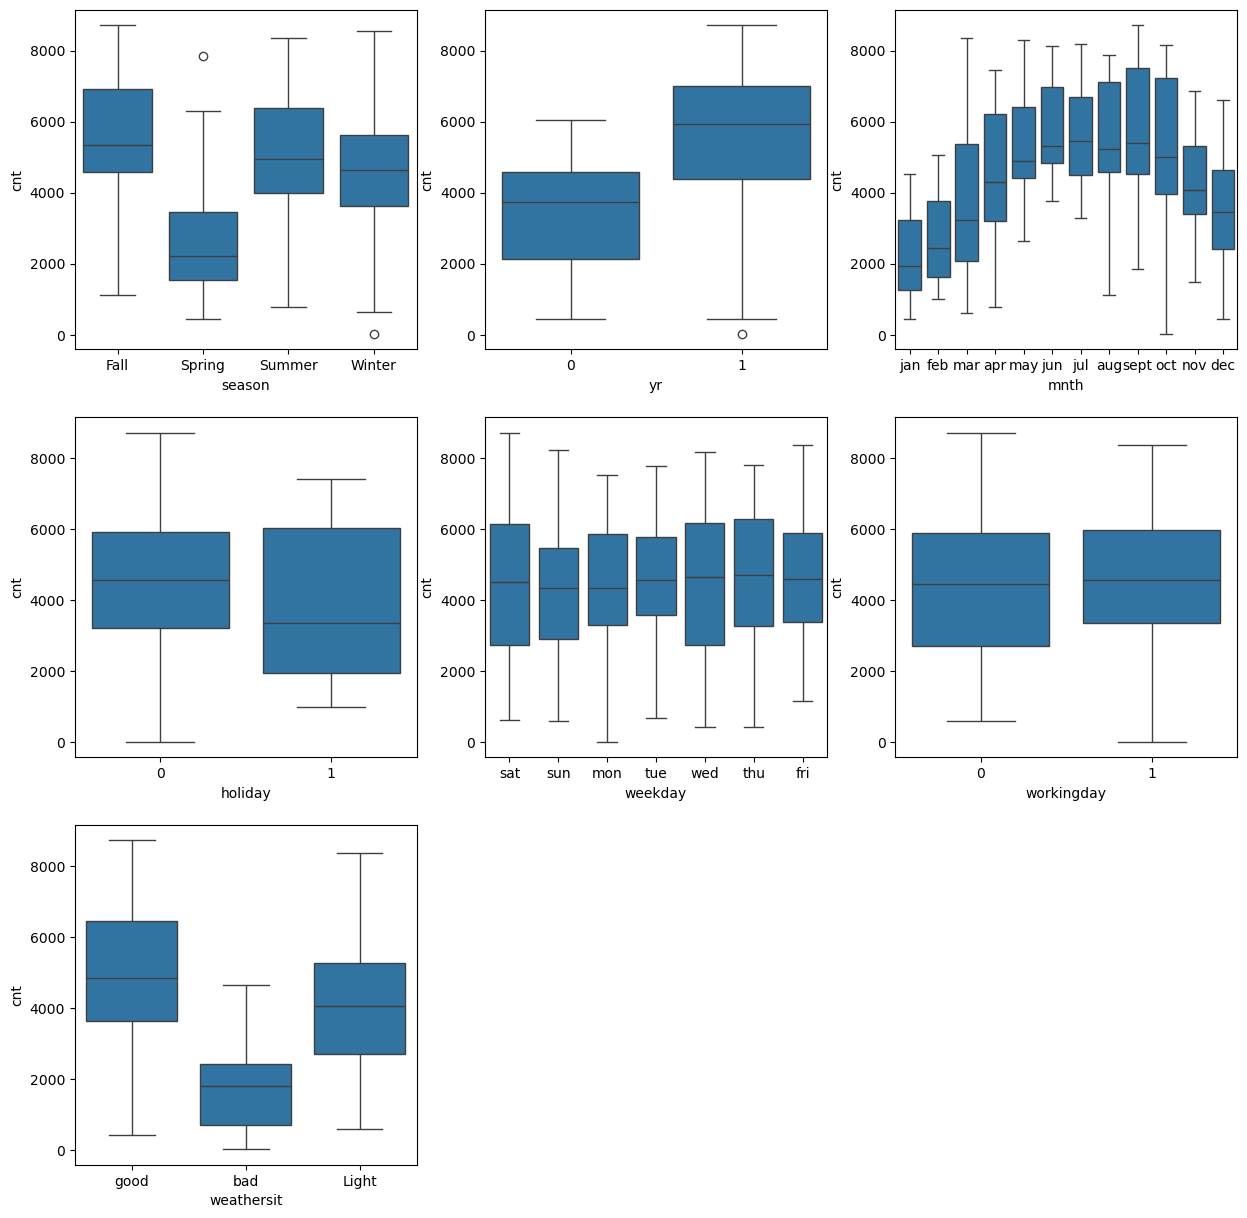

In [340]:
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=data, x=i[1], y='cnt')
plt.show()

Inference:
Here many insights can be drawn from the plots

1. Season: 3:fall has highest demand for rental bikes
2. I see that demand for next year has grownm
3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is decreasing
4. When there is a holiday, demand has decreased.
5. Weekday is not giving clear picture abount demand.
6. The clear weathershit has highest demand
7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme weather conditions

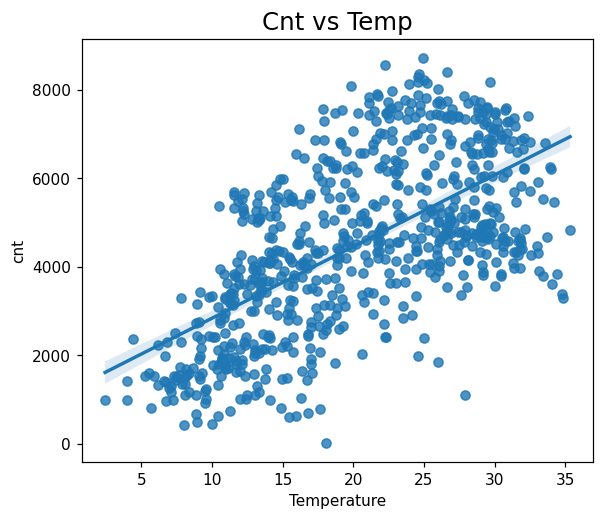

In [307]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

Inference:
Demand for bikes is positively correlated to temp.
We can see that cnt is linearly increasing with temp indicating linear relation.

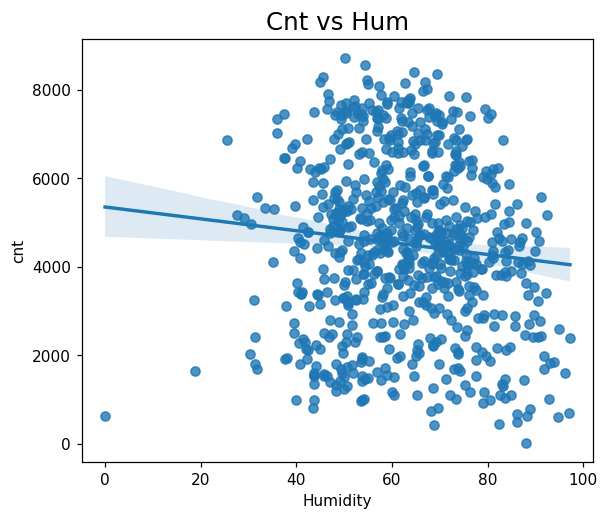

In [308]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

Inference:
Hum is values are more scattered around.
Although we can see cnt decreasing with increase in humidity.

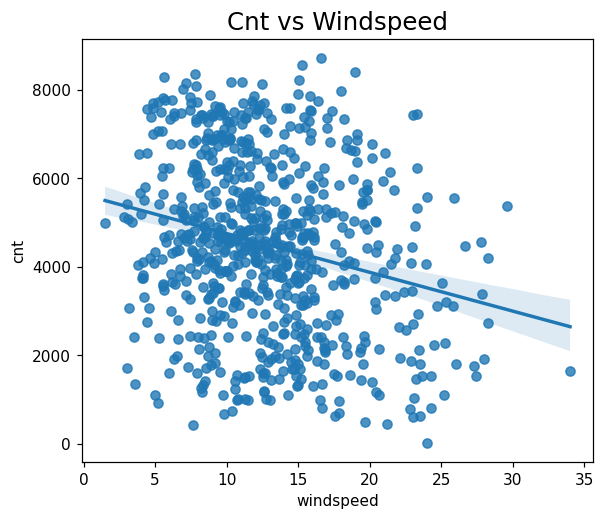

In [310]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="windspeed")
plt.show()

Inference:
Windspeed is values are more scattered around.
Although we can see cnt decreasing with increase in windspeed.

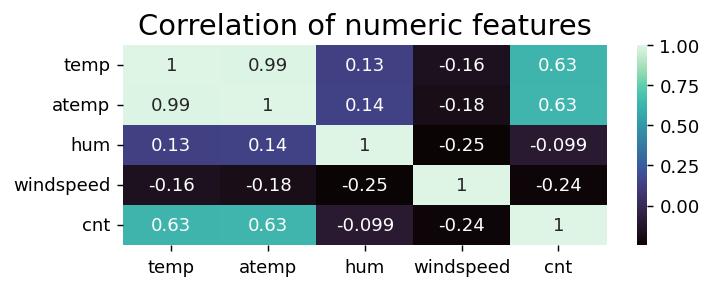

In [341]:
num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(6,2),dpi=130)
plt.title("Correlation of numeric features",fontsize=16)
sns.heatmap(bikeSharing_df[num_features].corr(),annot= True,cmap="mako")
plt.show()

_Inference_:
Temp and Atemp are highly correlated, we can take an action to remove one of them, but lets keep them for further analysis.
Temp and Atemp also have high correlation with cnt variable.

In [346]:
bikeSharing_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [347]:
bikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Light,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Light,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [381]:
bikeSharing_df11 = pd.get_dummies(data=bikeSharing_df,columns=["season","mnth","weekday"],drop_first=True)

In [382]:
bikeSharing_df11.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old,...,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
0,0,0,0,Light,14.110847,18.18125,80.5833,10.749882,985,0,...,False,False,False,False,False,True,False,False,False,False
1,0,0,0,Light,14.902598,17.68695,69.6087,16.652113,801,1,...,False,False,False,False,False,False,True,False,False,False
2,0,0,1,good,8.050924,9.47025,43.7273,16.636703,1349,2,...,False,False,False,False,True,False,False,False,False,False
3,0,0,1,good,8.200000,10.60610,59.0435,10.739832,1562,3,...,False,False,False,False,False,False,False,False,True,False
4,0,0,1,good,9.305237,11.46350,43.6957,12.522300,1600,4,...,False,False,False,False,False,False,False,False,False,True


In [384]:
bikeSharing_df11.columns

Index(['yr', 'holiday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'days_old', 'season_spring', 'season_summer',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed'],
      dtype='object')

In [385]:
bikeSharing_df31 = pd.get_dummies(data=bikeSharing_df11,columns=["weathersit"])

In [430]:
bikeSharing_df31.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Light', 'weathersit_bad',
       'weathersit_good'],
      dtype='object')

In [433]:
bikeSharing_df31.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light,weathersit_bad,weathersit_good
0,0,0,0,14.110847,18.18125,80.5833,10.749882,0,True,False,...,False,False,True,False,False,False,False,True,False,False
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,True,False,...,False,False,False,True,False,False,False,True,False,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,True,False,...,False,True,False,False,False,False,False,False,False,True
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,True,False,...,False,False,False,False,False,True,False,False,False,True
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,True,False,...,False,False,False,False,False,False,True,False,False,True


## Model Building

In [387]:
#y to contain only target variable
y=bikeSharing_df31.pop('cnt')

#X is all remaining variable also our independent variables
X=bikeSharing_df31

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [371]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light,weathersit_bad,weathersit_good
0,0,0,0,14.110847,18.18125,80.5833,10.749882,True,False,False,...,False,False,True,False,False,False,False,True,False,False
1,0,0,0,14.902598,17.68695,69.6087,16.652113,True,False,False,...,False,False,False,True,False,False,False,True,False,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,True,False,False,...,False,True,False,False,False,False,False,False,False,True
3,0,0,1,8.200000,10.60610,59.0435,10.739832,True,False,False,...,False,False,False,False,False,True,False,False,False,True
4,0,0,1,9.305237,11.46350,43.6957,12.522300,True,False,False,...,False,False,False,False,False,False,True,False,False,True


In [251]:
y.head()


0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [261]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 11)
(219, 11)


In [262]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [388]:
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [389]:
#Inspect stats fro Training set after scaling
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873,0.512409
std,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619,0.292268
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.254458
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.521262
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.770233
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [255]:
X_train.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,days_old,weathersit_good,weathersit_bad,weathersit_Light
683,1,nov,0,1,0.327133,0.322150,0.639330,0.327101,0.936900,False,False,True
645,1,oct,1,0,0.403972,0.404998,0.731215,0.419004,0.884774,False,False,True
163,0,jun,0,1,0.717562,0.685963,0.509660,0.708724,0.223594,True,False,False
360,0,dec,0,1,0.331287,0.326273,0.785745,0.415925,0.493827,False,False,True
640,1,oct,0,1,0.745598,0.682653,0.817947,0.110593,0.877915,False,False,True


In [434]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 683 to 102
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                511 non-null    int64  
 1   holiday           511 non-null    int64  
 2   workingday        511 non-null    int64  
 3   temp              511 non-null    float64
 4   atemp             511 non-null    float64
 5   hum               511 non-null    float64
 6   windspeed         511 non-null    float64
 7   days_old          511 non-null    float64
 8   season_spring     511 non-null    bool   
 9   season_summer     511 non-null    bool   
 10  season_winter     511 non-null    bool   
 11  mnth_aug          511 non-null    bool   
 12  mnth_dec          511 non-null    bool   
 13  mnth_feb          511 non-null    bool   
 14  mnth_jan          511 non-null    bool   
 15  mnth_jul          511 non-null    bool   
 16  mnth_jun          511 non-null    bool   
 17  

In [436]:
X_train['temp'] = X_train['temp'].astype(int)
X_train['atemp'] = X_train['atemp'].astype(int)
X_train['hum'] = X_train['hum'].astype(int)
X_train['windspeed'] = X_train['windspeed'].astype(int)
X_train['days_old'] = season_spring['days_old'].astype(int)

In [452]:
X_train = X_train.replace({True: 1, False: 0})

In [453]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 683 to 102
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   yr                511 non-null    int64
 1   holiday           511 non-null    int64
 2   workingday        511 non-null    int64
 3   temp              511 non-null    int64
 4   atemp             511 non-null    int64
 5   hum               511 non-null    int64
 6   windspeed         511 non-null    int64
 7   days_old          511 non-null    int64
 8   season_spring     511 non-null    int64
 9   season_summer     511 non-null    int64
 10  season_winter     511 non-null    int64
 11  mnth_aug          511 non-null    int64
 12  mnth_dec          511 non-null    int64
 13  mnth_feb          511 non-null    int64
 14  mnth_jan          511 non-null    int64
 15  mnth_jul          511 non-null    int64
 16  mnth_jun          511 non-null    int64
 17  mnth_mar          511 non-null    int6

In [256]:
y_train.head()

683    5445
645    5478
163    5020
360    1162
640    7572
Name: cnt, dtype: int64

In [454]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()

In [455]:
lr.fit(X_train,y_train)

LinearRegression()

In [456]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [457]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 15),
 ('season_winter', False, 6),
 ('mnth_aug', False, 8),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 12),
 ('mnth_jan', False, 2),
 ('mnth_jul', False, 7),
 ('mnth_jun', False, 5),
 ('mnth_mar', False, 10),
 ('mnth_may', False, 9),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 11),
 ('mnth_sept', False, 3),
 ('weekday_mon', False, 14),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 17),
 ('weekday_tue', False, 13),
 ('weekday_wed', False, 16),
 ('weathersit_Light', True, 1),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1)]

## Manual elimination

In [476]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [477]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [478]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [479]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'mnth_dec', 'mnth_nov', 'weekday_sat', 'weekday_sun',
       'weathersit_Light', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [480]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'season_summer', 'season_winter', 'mnth_aug', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sept', 'weekday_mon', 'weekday_thu', 'weekday_tue',
       'weekday_wed'],
      dtype='object')

In [481]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'mnth_oct', 'mnth_sept', 'weekday_sat', 'weekday_sun',
       'weathersit_Light', 'weathersit_bad', 'weathersit_good']]

In [474]:
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 683 to 102
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   yr                511 non-null    int64
 1   holiday           511 non-null    int64
 2   workingday        511 non-null    int64
 3   atemp             511 non-null    int64
 4   hum               511 non-null    int64
 5   windspeed         511 non-null    int64
 6   days_old          511 non-null    int64
 7   season_spring     511 non-null    int64
 8   mnth_oct          511 non-null    int64
 9   mnth_sept         511 non-null    int64
 10  weekday_sat       511 non-null    int64
 11  weekday_sun       511 non-null    int64
 12  weathersit_Light  511 non-null    int64
 13  weathersit_bad    511 non-null    int64
 14  weathersit_good   511 non-null    int64
dtypes: int64(15)
memory usage: 63.9 KB


In [466]:
import statsmodels.api as sm

In [482]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'mnth_oct', 'mnth_sept', 'weekday_sat', 'weekday_sun',
       'weathersit_Light', 'weathersit_bad', 'weathersit_good']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     140.3
Date:                Sat, 01 Jun 2024   Prob (F-statistic):          6.72e-145
Time:                        18:13:56   Log-Likelihood:                -4232.6
No. Observations:                 511   AIC:                             8489.
Df Residuals:                     499   BIC:                             8540.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1788.4867     79.945  

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


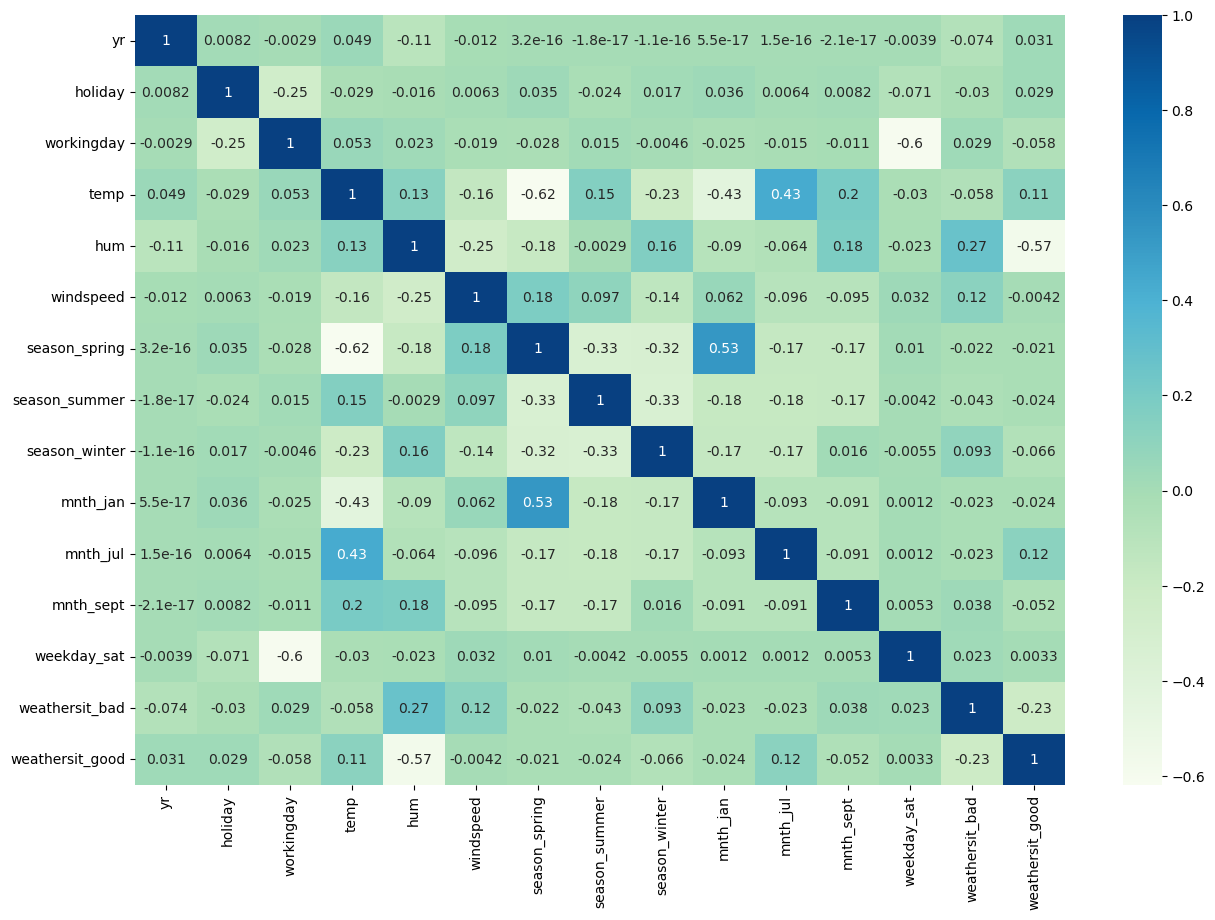

In [486]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(bikeSharing_df31[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_good']].corr(), cmap='GnBu', annot=True)
plt.show()

In [487]:
# Dropping the variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     129.3
Date:                Sat, 01 Jun 2024   Prob (F-statistic):          2.20e-144
Time:                        18:17:18   Log-Likelihood:                -4231.2
No. Observations:                 511   AIC:                             8488.
Df Residuals:                     498   BIC:                             8543.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3490.8053    183.990     

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [488]:
# Dropping the variable hum as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     129.3
Date:                Sat, 01 Jun 2024   Prob (F-statistic):          2.20e-144
Time:                        18:18:05   Log-Likelihood:                -4231.2
No. Observations:                 511   AIC:                             8488.
Df Residuals:                     498   BIC:                             8543.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3490.8053    183.990     

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [489]:
# Dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     140.7
Date:                Sat, 01 Jun 2024   Prob (F-statistic):          3.92e-145
Time:                        18:18:39   Log-Likelihood:                -4232.0
No. Observations:                 511   AIC:                             8488.
Df Residuals:                     499   BIC:                             8539.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3442.4536    179.964     

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [490]:
# Dropping the variable mnth_jul as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     155.0
Date:                Sat, 01 Jun 2024   Prob (F-statistic):          3.61e-146
Time:                        18:18:54   Log-Likelihood:                -4232.2
No. Observations:                 511   AIC:                             8486.
Df Residuals:                     500   BIC:                             8533.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3489.8796    159.495     

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [491]:
# Dropping the variable temp as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     155.0
Date:                Sat, 01 Jun 2024   Prob (F-statistic):          3.61e-146
Time:                        18:19:16   Log-Likelihood:                -4232.2
No. Observations:                 511   AIC:                             8486.
Df Residuals:                     500   BIC:                             8533.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3489.8796    159.495     

In [492]:
## Trying to replace July with spring as both were highly correlated

cols = ['yr', 'workingday', 'windspeed', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     74.30
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           2.94e-92
Time:                        18:19:38   Log-Likelihood:                -4360.0
No. Observations:                 511   AIC:                             8742.
Df Residuals:                     500   BIC:                             8789.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1384.8216    178.466     

In [493]:
## Trying to replace July with spring as both were highly correlated

cols = ['yr', 'workingday', 'windspeed', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     74.30
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           2.94e-92
Time:                        18:20:03   Log-Likelihood:                -4360.0
No. Observations:                 511   AIC:                             8742.
Df Residuals:                     500   BIC:                             8789.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1384.8216    178.466     

In [494]:
# Removing windspeed with spring as windspeed was highly correlated with temp
cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     154.6
Date:                Sat, 01 Jun 2024   Prob (F-statistic):          5.90e-146
Time:                        18:20:19   Log-Likelihood:                -4232.7
No. Observations:                 511   AIC:                             8487.
Df Residuals:                     500   BIC:                             8534.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3450.8562    179.871     

In [495]:
# using the weekend "Sunday" which was dropped during RFE instead of Saturday.

cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     152.6
Date:                Sat, 01 Jun 2024   Prob (F-statistic):          6.32e-145
Time:                        18:20:38   Log-Likelihood:                -4235.1
No. Observations:                 511   AIC:                             8492.
Df Residuals:                     500   BIC:                             8539.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3770.9690    174.911     

In [498]:
# adding temp and removed 'season_summer' and 'workingday'
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_good', 'temp']

#['yr', 'holiday','temp', 'spring','winter', 'July','September','Sunday','Light_Snow_Rain','Mist_Clody']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     188.2
Date:                Sat, 01 Jun 2024   Prob (F-statistic):          9.21e-146
Time:                        18:21:57   Log-Likelihood:                -4238.5
No. Observations:                 511   AIC:                             8495.
Df Residuals:                     502   BIC:                             8533.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3745.5368    103.060     

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


_Inference_
Here VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R2 is 0.821
Let us select Model 11 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables.
Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

In [499]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [500]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_good', 'temp']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

3745.5367850185885 [ 2043.46141895 -2634.64940554   289.37158395  -307.79388713
   859.06276566  -424.9634229  -1896.63125679   714.08613478
     0.        ]


In [501]:
y_train_pred = lr.predict(X_train[cols])


In [505]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

/var/folders/4c/17rkl4rn7k30vdcrh61zvf0w0000gn/T/ipykernel_58249/3357394689.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(act-pred)


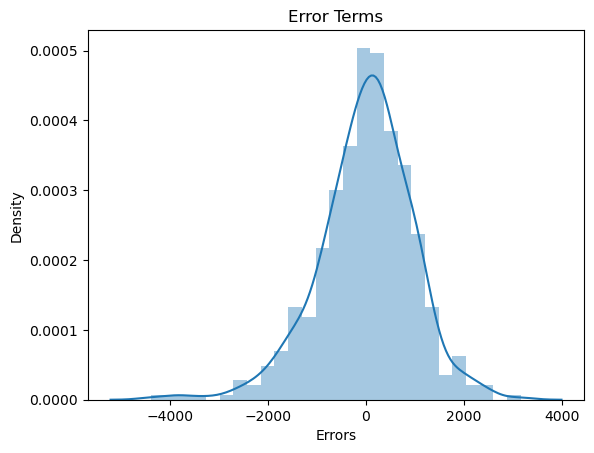

In [503]:
plot_res_dist(y_train, y_train_pred)


Errors are normally distribured here with mean 0. So everything seems to be fine

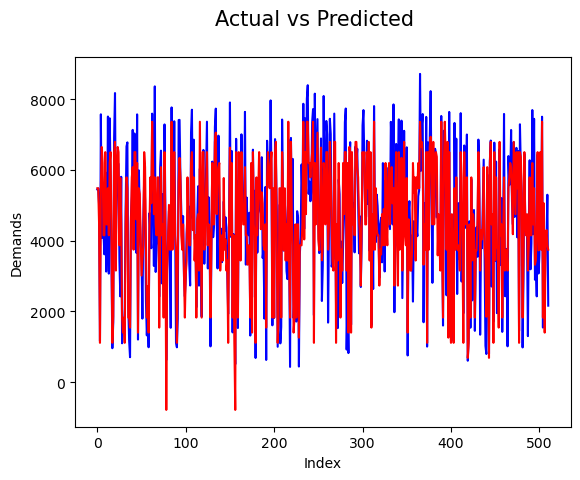

In [506]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

## Actual and Predicted result following almost the same pattern so this model seems ok

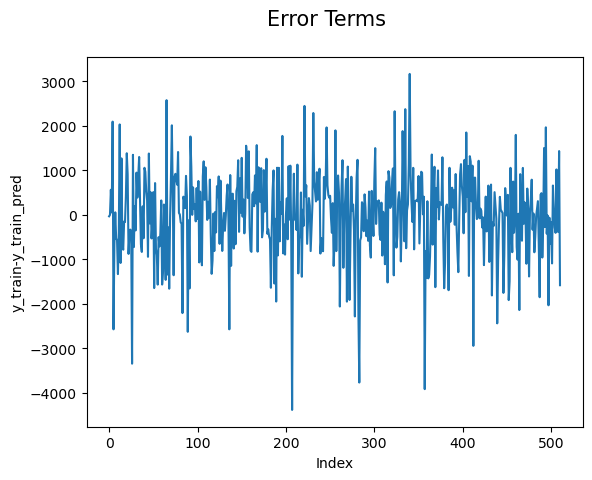

In [507]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

In [508]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.7499463363148966

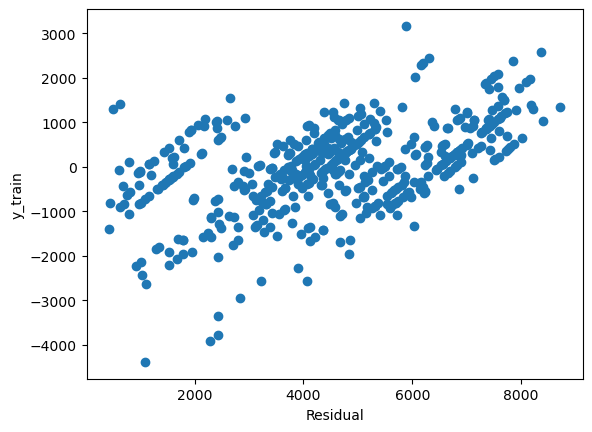

In [509]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

In [510]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [512]:
#Columns from our final model
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_good', 'temp']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

In [513]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.7263843159102201

Text(0, 0.5, 'y_test_pred')

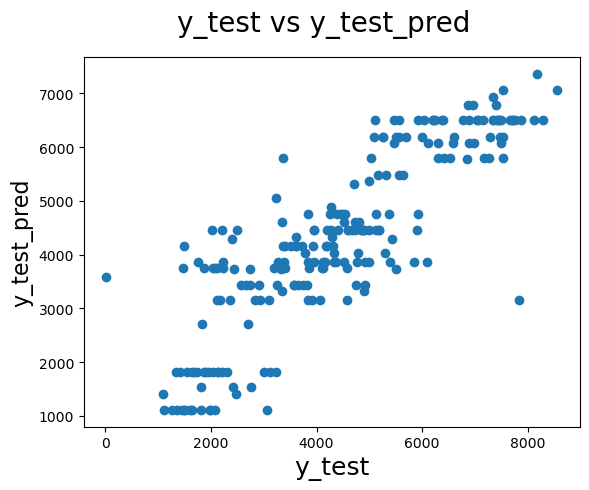

In [514]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

In [515]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

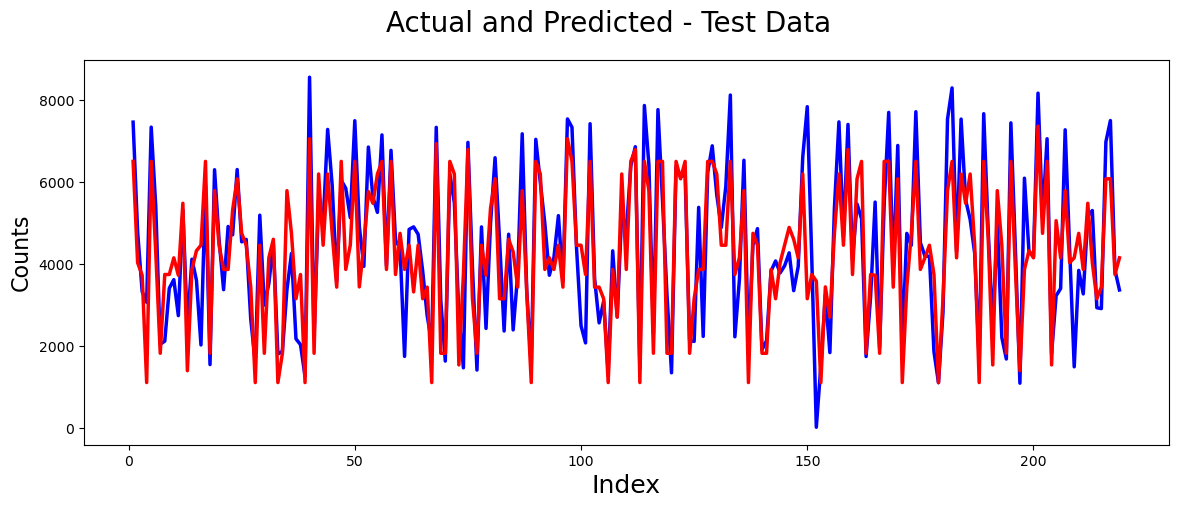

In [516]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

In [517]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

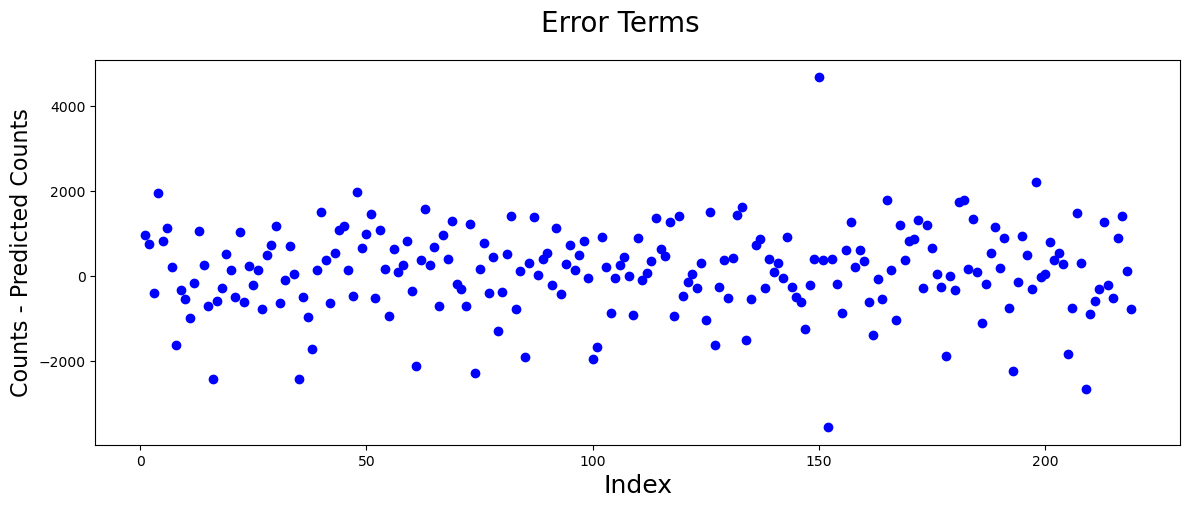

In [518]:
#Plot error terms for test data
plot_err_terms(y_test,y_test_pred)

In [519]:
# Checking data before scaling
bikeSharing_df31.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light,weathersit_bad,weathersit_good
0,0,0,0,14.110847,18.18125,80.5833,10.749882,0,True,False,...,False,False,True,False,False,False,False,True,False,False
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,True,False,...,False,False,False,True,False,False,False,True,False,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,True,False,...,False,True,False,False,False,False,False,False,False,True
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,True,False,...,False,False,False,False,False,True,False,False,False,True
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,True,False,...,False,False,False,False,False,False,True,False,False,True


In [520]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_good', 'temp']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     188.2
Date:                Sat, 01 Jun 2024   Prob (F-statistic):          9.21e-146
Time:                        18:26:23   Log-Likelihood:                -4238.5
No. Observations:                 511   AIC:                             8495.
Df Residuals:                     502   BIC:                             8533.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3745.5368    103.060     

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


# 
Interepretation of results
Analysing the above model, the comapany should focus on the following features:
Company should focus on expanding business during Spring.
Company should focus on expanding business during September.
Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.
Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.
Conclusion
Significant variables to predict the demand for shared bikes

holiday
temp
hum
windspeed
Season
months(January, July, September, November, December)
Year (2019)
Sunday
weathersit( Light Snow, Mist + Cloudy) 
#